In [66]:
import cv2
import os
import seaborn as sns
import pandas as pd
import subprocess
import time

# Haar Cascade Clasifier

## Part 1

Existing cascade has been downloaded from: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [59]:
def detect_face(img, cascade, scalefactor, minNeighbours):
    
    face_img = img.copy()
     #process image with cascade
    face_rect = cascade.detectMultiScale(face_img, scaleFactor = scalefactor, minNeighbors = minNeighbours)
     
     #draw shape to show what and where faces were found
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), 
                      (x + w, y + h), (255, 255, 255), 10)\
         
    return face_img

def image_testing(path, format, cascade, scaleFactorLst, MinNeighbourLst):
    if len(scaleFactorLst) != len(MinNeighbourLst):
        raise "Different len of scale factor list and min neighbour list"

    # iterate over files in directory searching for iamges
    for file in os.listdir(path):
        if file.endswith(format):
            #get output path
            img_file_name = file.replace(format, "")
            test_folder_name = f"{path}/{img_file_name}"

            #read image and turn it into RGB
            img = cv2.imread(f"{path}{file}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            #evaluate image with facecascade using provided parameters until there are no more parameters
            for i in range (0,len(scaleFactorLst)):
                processed_image = detect_face(img, cascade, scaleFactorLst[i], MinNeighbourLst[i])
                
                processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

                #save image
                os.makedirs(test_folder_name, exist_ok=True)
                writeStatus = cv2.imwrite(f"{test_folder_name}/{img_file_name}_test_{i+1}.jpg", processed_image)
                print(f"write status: {writeStatus}")
    
    print("Data Processed")
    return 0

In [53]:
haar_path = "../../data/haar_clasifier/exp_1/"

#import cascade
face_cascade = cv2.CascadeClassifier(f"../../data/haar_clasifier/haarcascade_frontalface_default.xml")

#import testing images
file_format = ".jpg"

scale_factors = [1.01, 1.05, 1.10, 1.20, 1.30, 1.50, 1.75, 2.00, 2.50, 3.00]
min_neighbors = [10]*10

print(f"exit code ", image_testing(haar_path, file_format, face_cascade, scale_factors, min_neighbors))


write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
Data Processed
exit code  0


img_1: total faces = 17
img_2: total faces = 6

img, total recognitions, correct recognitions, wrong recognitions
img_1_1, 22, 17, 5
img1_2, 19, 17, 2
img_1_3, 17, 17, 0
img_1_4, 15, 15, 0
img_1_5, 15, 15, 0
img_1_6, 16, 15, 1
img_1_7, 10, 10, 0
img_1_8, 5, 5, 0
img_1_9, 10, 10, 0
img_1_10, 11, 11, 0

img_2_1, 16, 6, 10
img_2_2, 10, 6, 4
img_2_3, 7, 6, 1
img_2_4, 6, 5, 1
img_2_5, 4, 4, 0
img_2_6, 3, 3, 0
img_2_7, 2, 2, 0
img_2_8, 1, 1, 0
img_2_9, 1, 1, 0
img_2_10, 1, 1, 0

In [54]:
exp_1 = pd.read_csv("../../data/haar_clasifier/exp_1/results.csv")
exp_1["scale_factors"] = scale_factors + scale_factors
print(exp_1.info())
exp_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   base_image          20 non-null     object 
 1   experiment          20 non-null     int64  
 2   total_faces         20 non-null     int64  
 3   total_recognised    20 non-null     int64  
 4   correct_recognised  20 non-null     int64  
 5   wrong_recognised    20 non-null     int64  
 6   scale_factors       20 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ KB
None


,base_image,experiment,total_faces,total_recognised,correct_recognised,wrong_recognised,scale_factors
0,img_1,1,17,22,17,5,1.01
1,img_1,2,17,19,17,2,1.05
2,img_1,3,17,17,17,0,1.10
3,img_1,4,17,15,15,0,1.20
4,img_1,5,17,15,15,0,1.30
5,img_1,6,17,16,15,1,1.50
6,img_1,7,17,10,10,0,1.75
7,img_1,8,17,5,5,0,2.00
8,img_1,9,17,10,10,0,2.50
9,img_1,10,17,11,11,0,3.00


<Axes: >

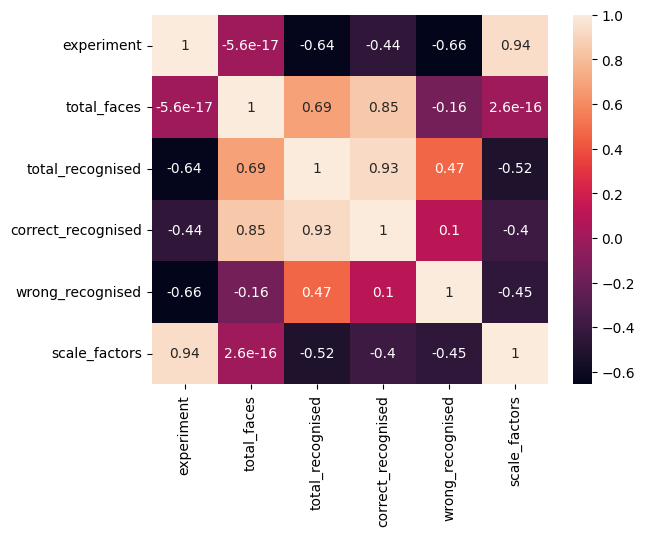

In [55]:
sns.heatmap(exp_1.drop(['base_image'], axis=1).corr(), annot=True)

## Part 2

In [60]:
haar_path = "../../data/haar_clasifier/exp_2/"

scale_factors = [1.20]*10
min_neighbors = [2,3,4,5,6,7,8,9,10,11]

print(f"exit code ", image_testing(haar_path, file_format, face_cascade, scale_factors, min_neighbors))

write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
Data Processed
exit code  0


img_1: total faces = 17
img_2: total faces = 6

img, total recognitions, correct recognitions, wrong recognitions
img_1_1, 20, 17, 3
img_1_2, 19, 17, 2
img_1_3, 18, 17, 1
img_1_4, 17, 17, 0
img_1_5, 16, 16, 0
img_1_6, 16, 16, 0
img_1_7, 16, 16, 0
img_1_8, 16, 16, 0
img_1_9, 15, 15, 0
img_1_10, 15, 15, 0

img_2_1, 11, 6, 5
img_2_2, 10, 6, 4
img_2_3, 9, 6, 3
img_2_4, 9, 6, 3
img_2_5, 9, 6, 3
img_2_6, 8, 6, 2
img_2_7, 7, 6, 1
img_2_8, 7, 6, 1
img_2_9, 6, 5, 1
img_2_10, 5, 5, 0

In [63]:
exp_2 = pd.read_csv("../../data/haar_clasifier/exp_2/results.csv")
exp_2["min_neighbors"] = min_neighbors + min_neighbors
print(exp_2.info())
exp_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   base_image          20 non-null     object
 1   experiment          20 non-null     int64 
 2   total_faces         20 non-null     int64 
 3   total_recognised    20 non-null     int64 
 4   correct_recognised  20 non-null     int64 
 5   wrong_recognised    20 non-null     int64 
 6   min_neighbors       20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB
None


,base_image,experiment,total_faces,total_recognised,correct_recognised,wrong_recognised,min_neighbors
0,img_1,1,17,20,17,3,2
1,img_1,2,17,19,17,2,3
2,img_1,3,17,18,17,1,4
3,img_1,4,17,17,17,0,5
4,img_1,5,17,16,16,0,6
5,img_1,6,17,16,16,0,7
6,img_1,7,17,16,16,0,8
7,img_1,8,17,16,16,0,9
8,img_1,9,17,15,15,0,10
9,img_1,10,17,15,15,0,11


<Axes: >

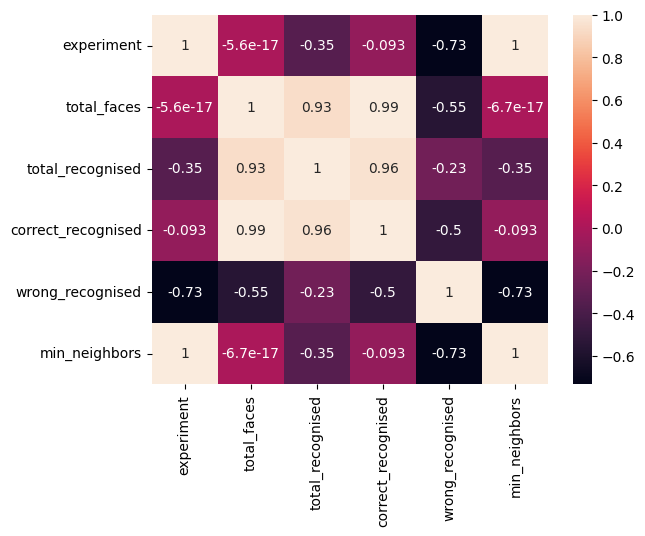

In [64]:
sns.heatmap(exp_2.drop(['base_image'], axis=1).corr(), annot=True)

## Part 3

In [75]:
haar_path = "../../data/haar_clasifier/exp_3/"

def take_photos(file_name, delay_s=3):
        folder_path = f"{haar_path}"
        os.makedirs(folder_path, exist_ok=True)

        print("\nTaking photo in...")
        while delay_s > 0:
            print(f"{delay_s}...")
            time.sleep(1)
            delay_s -= 1

        image_path = f"{folder_path}/{file_name}.jpg"
        command = f"fswebcam --no-banner --jpeg 95 {image_path}"
        subprocess.run(command, shell=True)

take_photos("img_1")
take_photos("img_2")
take_photos("img_3")


Taking photo in...
3...
2...
1...


--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 352x288.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Setting output format to JPEG, quality 95
Writing JPEG image to '../../data/haar_clasifier/exp_3//img_1.jpg'.



Taking photo in...
3...
2...
1...


--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 352x288.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Setting output format to JPEG, quality 95
Writing JPEG image to '../../data/haar_clasifier/exp_3//img_2.jpg'.



Taking photo in...
3...
2...
1...


--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 352x288.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Setting output format to JPEG, quality 95
Writing JPEG image to '../../data/haar_clasifier/exp_3//img_3.jpg'.


In [76]:
haar_path = "../../data/haar_clasifier/exp_3/"

scale_factors = [1.10, 1.20, 1.30]
min_neighbors = [6, 8, 9]

print(f"exit code ", image_testing(haar_path, file_format, face_cascade, scale_factors, min_neighbors))

write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
write status: True
Data Processed
exit code  0


all images have 1 face

img, total recognitions, correct recognitions, wrong recognitions
img_1_1, 1, 1, 1
img_1_2, 1, 1, 1
img_1_3, 1, 1, 1

img_2_1, 1, 1, 1
img_2_2, 1, 1, 1
img_2_3, 0, 0, 0

img_3_1, 0, 0, 0
img_3_2, 0, 0, 0
img_3_3, 0, 0, 0

In [78]:
exp_3 = pd.read_csv("../../data/haar_clasifier/exp_3/results.csv")
exp_3["scale_factors"] = scale_factors + scale_factors + scale_factors
exp_3["min_neighbors"] = min_neighbors + min_neighbors + min_neighbors
print(exp_3.info())
exp_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   base_image          9 non-null      object 
 1   experiment          9 non-null      int64  
 2   total_faces         9 non-null      int64  
 3   total_recognised    9 non-null      int64  
 4   correct_recognised  9 non-null      int64  
 5   wrong_recognised    9 non-null      int64  
 6   scale_factors       9 non-null      float64
 7   min_neighbors       9 non-null      int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 708.0+ bytes
None


,base_image,experiment,total_faces,total_recognised,correct_recognised,wrong_recognised,scale_factors,min_neighbors
0,img_1,1,1,1,1,1,1.1,6
1,img_1,2,1,1,1,1,1.2,8
2,img_1,3,1,1,1,1,1.3,9
3,img_2,1,1,1,1,1,1.1,6
4,img_2,2,1,1,1,1,1.2,8
5,img_2,3,1,0,0,0,1.3,9
6,img_3,1,1,0,0,0,1.1,6
7,img_3,2,1,0,0,0,1.2,8
8,img_3,3,1,0,0,0,1.3,9


<Axes: >

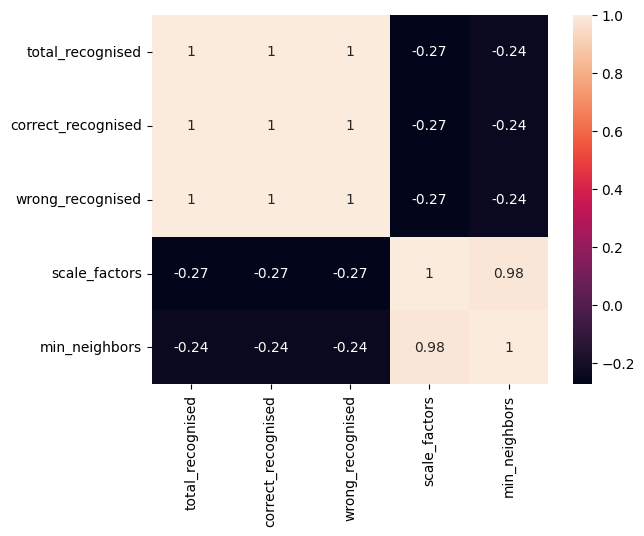

In [82]:
sns.heatmap(exp_3.drop(['base_image', 'total_faces', 'experiment'], axis=1).corr(), annot=True)